Plots: MultiYX1DPlotter
=========================

This example illustrates how to plot multi 1D figure lines on the same plot.

It uses the specific example of plotting a `MassProfile`'s 1D convergence using multiple `MassProfilePlotter`'s.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create two simple `MassProfile`'s which we'll plot the 1D convergences of on the same figure.

In [2]:
mass_0 = al.mp.EllIsothermal(
    centre=(0.0, 0.0),
    einstein_radius=1.0,
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.7, angle=45.0),
)

mass_1 = al.mp.EllPowerLaw(
    centre=(0.0, 0.0),
    einstein_radius=1.0,
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.7, angle=45.0),
    slope=2.1,
)

We also need the 2D grid the `MassProfile`'s are evaluated on.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We now pass the mass profiles and grid to a `MassProfilePlotter` and create a `MultiYX1DPlotter` which will be
used to plot both of their convergences in 1D on the same figure.

In [4]:
mat_plot_1d = aplt.MatPlot1D(yx_plot=aplt.YXPlot(plot_axis_type="semilogy"))

mass_profile_plotter_0 = aplt.MassProfilePlotter(
    mass_profile=mass_0, grid=grid, mat_plot_1d=mat_plot_1d
)
mass_profile_plotter_1 = aplt.MassProfilePlotter(
    mass_profile=mass_1, grid=grid, mat_plot_1d=mat_plot_1d
)

We use these plotters to create a `MultiYX1DPlotter` which plot both of their convergences in 1D on the same figure.

In [5]:
multi_plotter = aplt.MultiYX1DPlotter(
    plotter_list=[mass_profile_plotter_0, mass_profile_plotter_1]
)

We now use the multi plotter to plot the convergences, where:

 - `func_name`: he name of the `MassProfilePlotter` function we call, in this case `figures_1d`.
 - `figure_name`: the name of the function's boolean input we set to True such that it plots, in this case `convergence`.
 
The input therefore corresponds to us writing `mass_profile_plotter.figures_1d(convergence=True)` for each plotter.

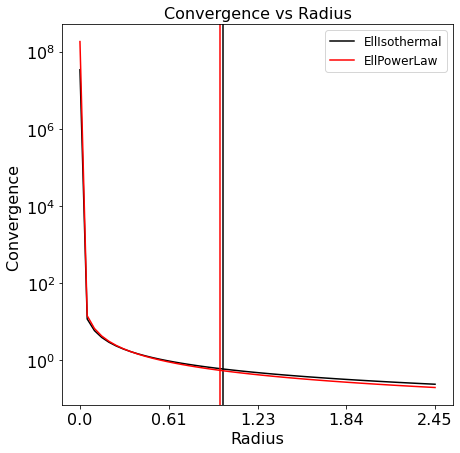

In [6]:
multi_plotter.figure_1d(func_name="figures_1d", figure_name="convergence")
